In [1]:
!pip install lime

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Classification imports
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')


In [3]:
#Load the dataset
data = pd.read_csv('heart.csv')
#Get an overview of the dataset
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#Retrieve the number of rows and columns
nrow, ncol = data.shape
nrow, ncol

(918, 12)

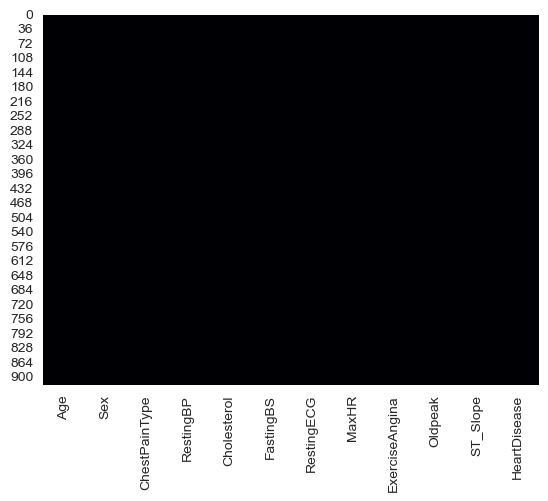

In [5]:
#Visually represent the distribution of missing values in the dataset with a heatmap
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [6]:
# Selecting only categorical variables
ds_cat = data.select_dtypes(include = 'object').copy()
ds_cat.head(2)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat


In [7]:
# Check if there are any missing values
ds_cat['RestingECG'].isnull().sum()

0

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

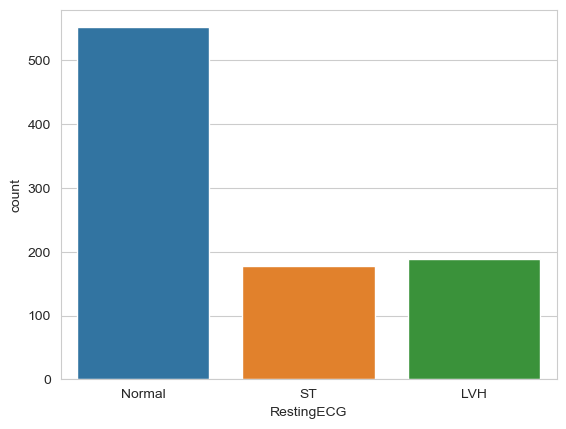

In [8]:
# Count plot 
sns.countplot(data = ds_cat, x = 'RestingECG')

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

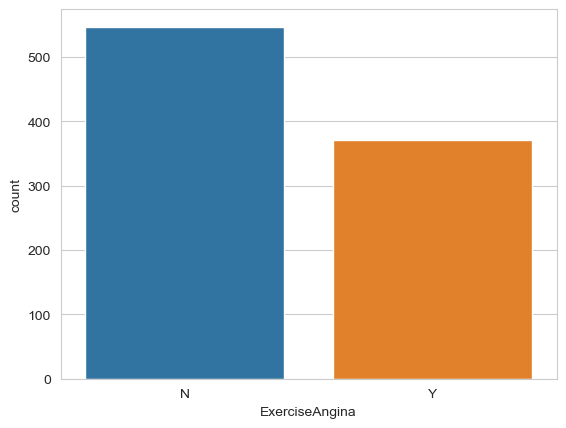

In [9]:
# Count plot 
sns.countplot(data = ds_cat, x = 'ExerciseAngina')

<AxesSubplot:xlabel='RestingECG', ylabel='RestingBP'>

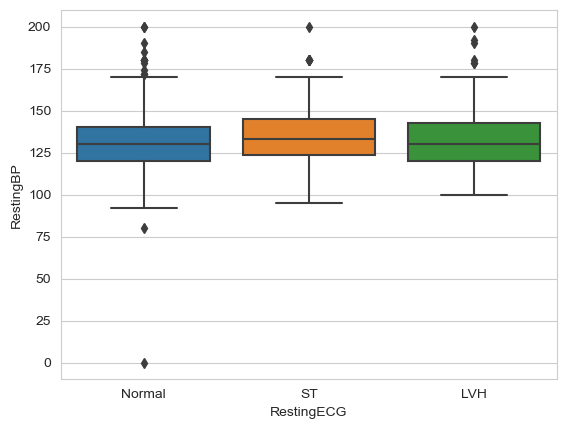

In [10]:
sns.boxplot(data = data, x='RestingECG', y='RestingBP')

<AxesSubplot:xlabel='RestingECG', ylabel='RestingBP'>

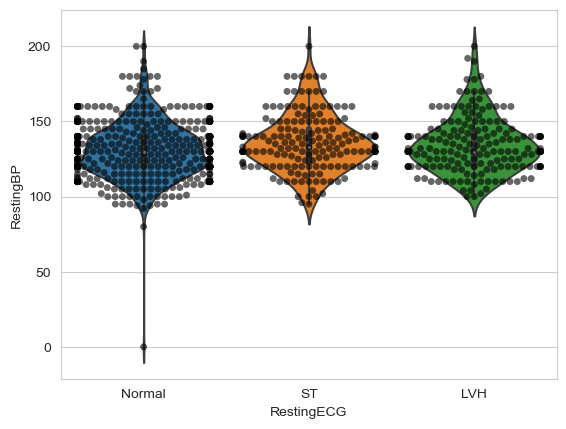

In [11]:
sns.violinplot(data = data, x='RestingECG', y='RestingBP')
sns.swarmplot(data = data, x='RestingECG', y='RestingBP', color = 'k', alpha = 0.6)

<AxesSubplot:xlabel='ChestPainType', ylabel='RestingBP'>

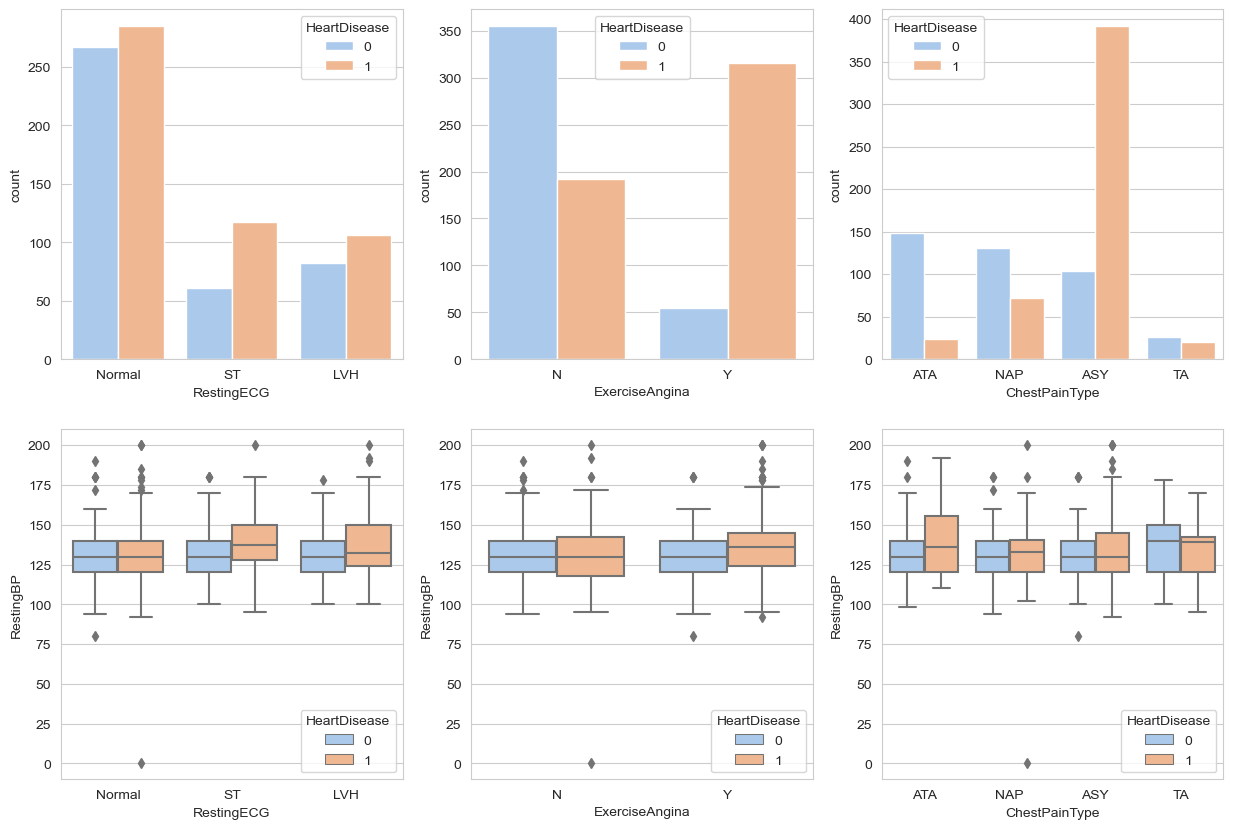

In [12]:
fig = plt.figure(figsize = (15,10))

my_pal = ['lightblue', 'lightyellow']

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = data, x = 'RestingECG', ax=ax1, hue='HeartDisease', palette='pastel')

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = data, x = 'ExerciseAngina', ax=ax2, hue='HeartDisease', palette='pastel')

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = data, x = 'ChestPainType', ax=ax3, hue='HeartDisease', palette='pastel')

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = data, x = 'RestingECG', y = 'RestingBP' , hue='HeartDisease',  
            ax=ax4, palette='pastel')
# sns.boxplot(data = data[data['HeartDisease']==0], x = 'RestingECG', y = 'RestingBP' , 
#             ax=ax4, boxprops=dict(alpha=.9), palette="Blues")
#sns.violinplot(data = ds_cat, x = 'MSZoning', y = 'SalePrice' , ax=ax4)
#sns.swarmplot(data = ds_cat, x = 'MSZoning', y='SalePrice', color = 'k', alpha = 0.4, ax=ax4  )

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = data, x = 'ExerciseAngina', y = 'RestingBP', ax=ax5, hue='HeartDisease', palette='pastel')
#sns.violinplot(data = ds_cat, x = 'LotShape', y = 'SalePrice', ax=ax5)
#sns.swarmplot(data = ds_cat, x = 'LotShape', y='SalePrice', color = 'k', alpha = 0.4, ax=ax5  )

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = data, x = 'ChestPainType', y = 'RestingBP', ax=ax6, hue='HeartDisease', palette='pastel')
#sns.violinplot(data = ds_cat, x = 'LotConfig', y = 'SalePrice', ax=ax6)
#sns.swarmplot(data = ds_cat, x = 'LotConfig', y='SalePrice', color = 'k', alpha = 0.4, ax=ax6  )

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Create a copy of the original DataFrame 'data'
df1 = data.copy(deep=True)

# Encode the 'Sex' column using LabelEncoder
df1['Sex'] = le.fit_transform(df1['Sex'])

# Encode the 'ChestPainType' column using LabelEncoder
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])

# Encode the 'RestingECG' column using LabelEncoder
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])

# Encode the 'ExerciseAngina' column using LabelEncoder
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])

# Encode the 'ST_Slope' column using LabelEncoder
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])


In [14]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [15]:
from sklearn.preprocessing import StandardScaler

# df1_changed = df1[['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'MaxHR', 
#                    'FastingBS', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
#        'HeartDisease']]

# Extract the input features and target variable as numpy arrays
X = df1[df1.columns[:-1]].to_numpy()
y = df1['HeartDisease'].to_numpy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the input features
X = scaler.fit_transform(X)
df1[df1.columns[:-1]] = X

In [16]:
df1.columns[:-1]

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [17]:
# Calculate Spearman correlation on the radiomics features dataset
# and disregard the features if the correlation is higher than 0.2

# Create an empty DataFrame with columns and indices same as 'data'
spearman_corr_df = pd.DataFrame(columns=data.columns, index=data.columns)

# Calculate the p-values for Spearman correlation
p_values = pd.DataFrame(columns=spearman_corr_df.columns, index=spearman_corr_df.columns)

# Iterate over each column pair in 'spearman_corr_df'
for col1 in spearman_corr_df.columns:
    for col2 in spearman_corr_df.columns:
        # Calculate the correlation coefficient and p-value using Spearman's rank correlation
        coef, p_value = spearmanr(df1[col1], df1[col2])
        
        # Assign the p-value to the corresponding cell in 'p_values'
        p_values.loc[col1, col2] = p_value
        
        # Assign the correlation coefficient to the corresponding cell in 'spearman_corr_df'
        spearman_corr_df.loc[col1, col2] = coef

# Calculate the absolute values of the 'spearman_corr_df' DataFrame
spearman_corr_df_abs = np.abs(spearman_corr_df)

# Convert the 'spearman_corr_df' DataFrame to numeric type
spearman_corr_df = spearman_corr_df.apply(pd.to_numeric)

# Convert the 'p_values' DataFrame to numeric type
p_values = p_values.apply(pd.to_numeric)


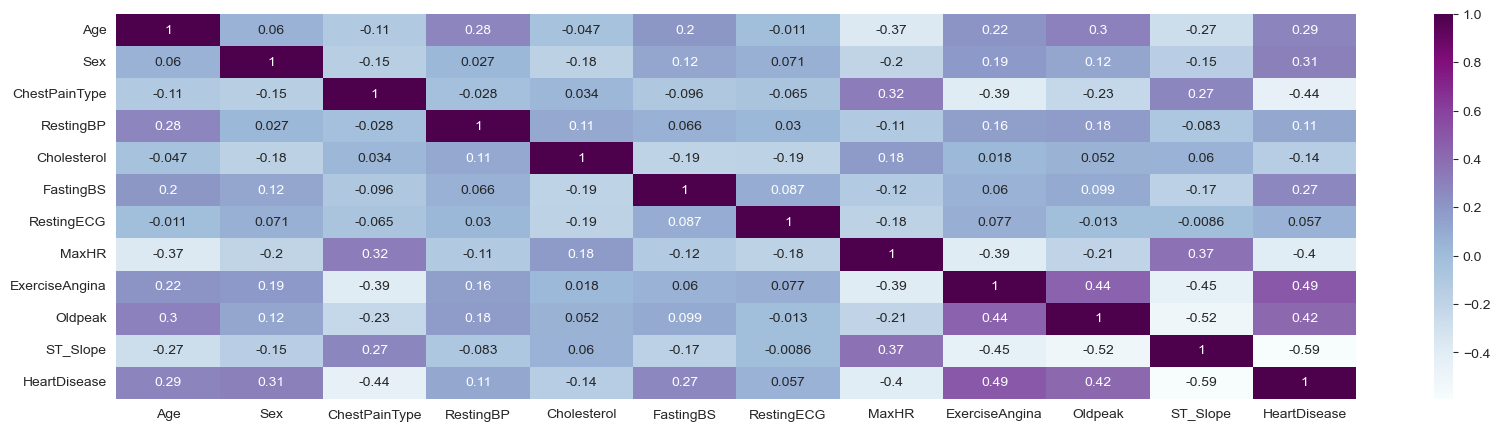

In [18]:
plt.figure(figsize = (20,5))
sns.heatmap(spearman_corr_df,annot = True, cmap='BuPu');

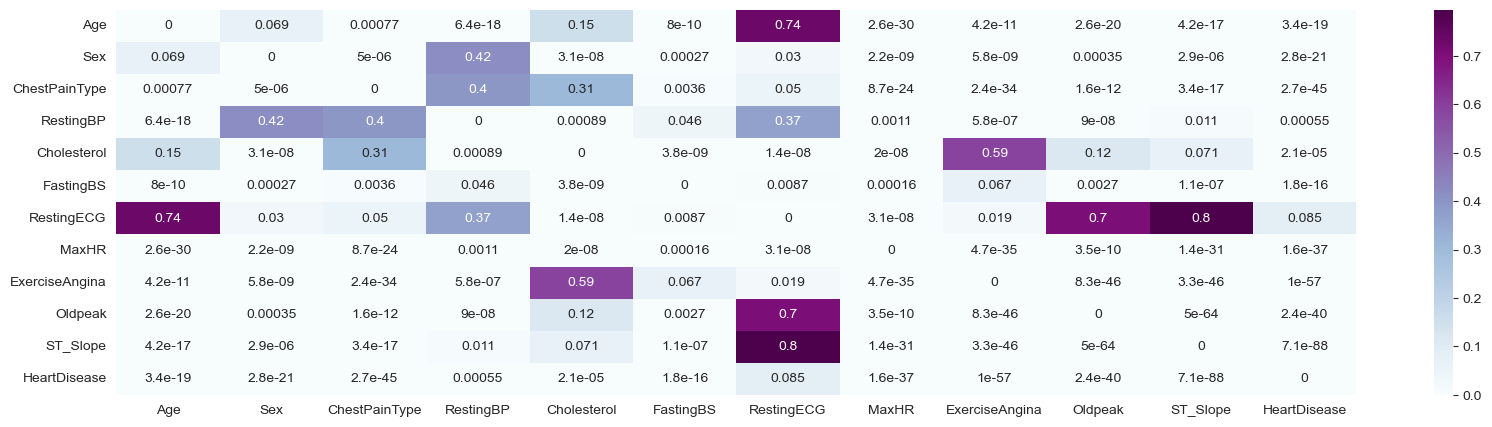

In [19]:
plt.figure(figsize = (20,5))
sns.heatmap(p_values,annot = True, cmap='BuPu');

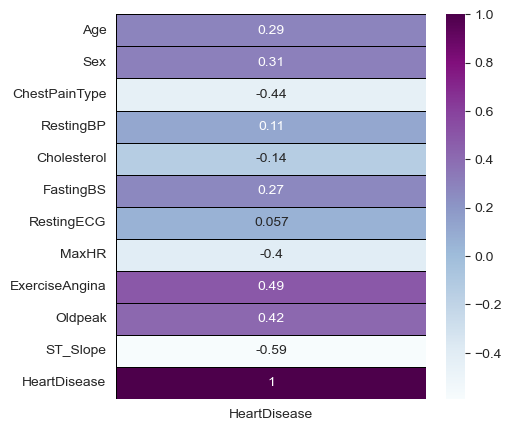

In [20]:
plt.subplots(figsize = (5,5))
sns.heatmap(spearman_corr_df['HeartDisease'].to_frame(),
            annot = True,
            cmap = 'BuPu',linewidths = 0.4,linecolor = 'black');

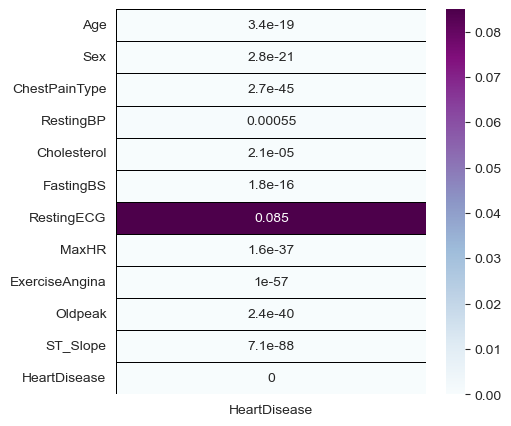

In [21]:
plt.subplots(figsize = (5,5))
sns.heatmap(p_values['HeartDisease'].to_frame(),
            annot = True,
            cmap = 'BuPu',linewidths = 0.4,linecolor = 'black');

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [23]:
# Train an SVM model and evaluate performance
# MKL SVM with K-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

 # Train an SVM classifier
    clf1 = SVC(kernel='linear', probability=True)
    clf1.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = clf1.predict(X_val_fold)
    y_prob_val = clf1.predict_proba(X_val_fold)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Train the final model on the entire training set
clf1 = SVC(kernel='linear', probability=True)

clf1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = clf1.predict(X_test)
y_prob_test = clf1.predict_proba(X_test)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.4f}')
print(f'Average sensitivity: {average_sensitivity:.4f}')
print(f'Average AUC: {average_auc:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test sensitivity: {test_sensitivity:.4f}')
print(f'Test AUC: {test_auc:.4f}')


# Store metrics for future use
sensitivities_pca_svm = test_sensitivity
auc_pca_svm = test_auc


Average accuracy: 0.8583
Average sensitivity: 0.8852
Average AUC: 0.9117
Test accuracy: 0.8370
Test sensitivity: 0.8224
Test AUC: 0.8982


In [24]:
# MKL SVM with K-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

accuracies = []
sensitivities = []
aucs = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

 # Train an SVM classifier
    clf1 = SVC(kernel='linear', probability=True)
    clf2 = SVC(kernel='rbf', probability=True)
    clf3 = SVC(kernel='poly', probability=True)

    voting_clf = VotingClassifier(estimators=[('linear', clf1), ('rbf', clf2), ('poly', clf3)], voting='soft')
    voting_clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = voting_clf.predict(X_val_fold)
    y_prob_val = voting_clf.predict_proba(X_val_fold)[:, 1]

    # Compute metrics
    accuracy_fold = accuracy_score(y_val_fold, y_pred_val)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred_val).ravel()
    sensitivity_fold = tp / (tp + fn)
    fpr, tpr, _ = roc_curve(y_val_fold, y_prob_val)
    auc_fold = auc(fpr, tpr)

    accuracies.append(accuracy_fold)
    sensitivities.append(sensitivity_fold)
    aucs.append(auc_fold)

# Store metrics for future use
average_accuracy = np.mean(accuracies)
average_sensitivity = np.mean(sensitivities)
average_auc = np.mean(aucs)

# Train the final model on the entire training set
clf1 = SVC(kernel='linear', probability=True)
clf2 = SVC(kernel='rbf', probability=True)
clf3 = SVC(kernel='poly', probability=True)

voting_clf = VotingClassifier(estimators=[('linear', clf1), ('rbf', clf2), ('poly', clf3)], voting='soft')
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = voting_clf.predict(X_test)
y_prob_test = voting_clf.predict_proba(X_test)[:, 1]

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
test_sensitivity = tp / (tp + fn)
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
test_auc = auc(fpr, tpr)

# Print and store metrics
print(f'Average accuracy: {average_accuracy:.4f}')
print(f'Average sensitivity: {average_sensitivity:.4f}')
print(f'Average AUC: {average_auc:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test sensitivity: {test_sensitivity:.4f}')
print(f'Test AUC: {test_auc:.4f}')


# Store metrics for future use
sensitivities_pca_mkl_svm = test_sensitivity
auc_pca_mkl_svm = test_auc

Average accuracy: 0.8529
Average sensitivity: 0.8802
Average AUC: 0.9194
Test accuracy: 0.8641
Test sensitivity: 0.8505
Test AUC: 0.9205


## LIME 

In [25]:
import lime
import lime.lime_tabular
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

In [26]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=df1.columns[:-1], 
                                                   class_names=set(df1[df1.columns[-1]]))
# Choose a data point for explanation
# predicted labels - y_pred_test

# results_TP = np.zeros((1, len(df1.columns[:-1])))
# results_FP = np.zeros((1, len(df1.columns[:-1])))
# results_TN = np.zeros((1, len(df1.columns[:-1])))
# results_FN = np.zeros((1, len(df1.columns[:-1])))

results_TP = {}
results_FP = {}
results_TN = {}
results_FN = {}

for i in tqdm(range(len(X_test))):
    data_point = X_test[i]
    true_lab = y_test[i]
    pred_lab = y_pred_test[i]

    # Generate explanations for the prediction
    explanation = explainer.explain_instance(data_point, voting_clf.predict_proba, num_features=len(df1.columns[:-1]))
    
    
    if true_lab == pred_lab == 1:
        values = explanation.as_list(label=true_lab)
        #results_TP += [values[i][-1] for i in range(len(values))]
        for i in range(len(values)):
            if results_TP.get(values[i][0]):
                results_TP[values[i][0]].append(max(values[i][-1], 0))
            else:
                results_TP[values[i][0]] = [max(values[i][-1], 0)]
                
    elif true_lab == pred_lab == 0:
        values = explanation.as_list(label=1)
        #results_TN += [-values[i][-1] for i in range(len(values))]
        for i in range(len(values)):
#             print(values[i][0])
            if results_TN.get(values[i][0]):
                results_TN[values[i][0]].append((-1) * min(values[i][-1], 0))
            else:
                results_TN[values[i][0]] = [(-1) * min(values[i][-1], 0)]
                
    elif true_lab == 1 and pred_lab == 0:
        values = explanation.as_list(label=1)
        #results_FN += [-values[i][-1] for i in range(len(values))]
        for i in range(len(values)):
            if results_FN.get(values[i][0]):
                results_FN[values[i][0]].append((-1) * min(values[i][-1], 0))
            else:
                results_FN[values[i][0]] = [(-1) * min(values[i][-1], 0)]
                
    elif true_lab == 0 and pred_lab == 1:
        values = explanation.as_list(label=pred_lab)
        #results_FP += [values[i][-1] for i in range(len(values))]
        for i in range(len(values)):
            if results_FP.get(values[i][0]):
                results_FP[values[i][0]].append(max(values[i][-1], 0))
            else:
                results_FP[values[i][0]] = [max(values[i][-1], 0)]

# results_TP /= len(X_test)
# results_TN /= len(X_test)
# results_FP /= len(X_test)
# results_FN /= len(X_test)
#     print(explanation.as_list(label=y_))
#     break
    # Display the explanation
#     explanation.show_in_notebook()

100%|█████████████████████████████████████████| 184/184 [10:57<00:00,  3.58s/it]


In [27]:
columns_all = df1.columns[:-1]

results_TP_1 = {}
results_FP_1 = {}
results_TN_1 = {}
results_FN_1 = {}
results = [results_TP, results_TN, results_FP, results_FN]


for r in range(len(results)):
    for column in columns_all:
        results_TP_1[column] = []
        results_FP_1[column] = []
        results_TN_1[column] = []
        results_FN_1[column] = []

for r in range(len(results)):
    for column in columns_all:
        
        for c in results[r].keys():
            if column in c:
#                 print(column)
                if r == 0:
#                     print(results[r][c])
                    results_TP_1[column] = results_TP_1[column] + results[r][c]
                elif r == 1:
                    results_TN_1[column] += results[r][c]
                elif r == 2:
                    results_FP_1[column] += results[r][c]                
                elif r == 3:
                    results_FN_1[column] += results[r][c]  
        

In [28]:
dicts = [results_TP_1, results_TN_1, results_FP_1, results_FN_1]

# Iterate over the dictionaries
for i, dictionary in enumerate(dicts):
    print(f"Dictionary {i+1}:")
    for key, value in dictionary.items():
        count = len(value)
        print(f"Number of values in {key}: {count}")
    print()

Dictionary 1:
Number of values in Age: 91
Number of values in Sex: 91
Number of values in ChestPainType: 91
Number of values in RestingBP: 91
Number of values in Cholesterol: 91
Number of values in FastingBS: 91
Number of values in RestingECG: 91
Number of values in MaxHR: 91
Number of values in ExerciseAngina: 91
Number of values in Oldpeak: 91
Number of values in ST_Slope: 91

Dictionary 2:
Number of values in Age: 68
Number of values in Sex: 68
Number of values in ChestPainType: 68
Number of values in RestingBP: 68
Number of values in Cholesterol: 68
Number of values in FastingBS: 68
Number of values in RestingECG: 68
Number of values in MaxHR: 68
Number of values in ExerciseAngina: 68
Number of values in Oldpeak: 68
Number of values in ST_Slope: 68

Dictionary 3:
Number of values in Age: 9
Number of values in Sex: 9
Number of values in ChestPainType: 9
Number of values in RestingBP: 9
Number of values in Cholesterol: 9
Number of values in FastingBS: 9
Number of values in RestingECG

In [29]:
# make_neg = [results_TN_1, results_FN_1]
# # print(results_TN_1['MaxHR'])
# for dictionary in make_neg:
#     for key, values in dictionary.items():
#         # Negate each value in the list
#         dictionary[key] = [-value for value in values]
# # print(results_TN_1['MaxHR'])
# # TP, TN, FP, FN 

In [30]:
# Create a new dictionary to store mean values
mean_dict = {}
dicts = [results_TP_1, results_TN_1, results_FP_1, results_FN_1]

# Iterate over the dictionaries
for dictionary in dicts:
    # Iterate over the keys in the dictionary
    for key, values in dictionary.items():
        # Calculate the mean value
        mean_value = np.mean(values)
        
        # Add the mean value to the mean dictionary
        if key in mean_dict:
            mean_dict[key].append(mean_value)
        else:
            mean_dict[key] = [mean_value]

# mean_dict

In [31]:
# matrix = np.vstack((results_TP, results_TN, results_FP, results_FN))

df = pd.DataFrame(mean_dict) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.010849,0.0,0.045196,0.005532,0.042982,0.025618,0.002389,0.025101,0.066991,0.058324,0.349190
1,0.012044,0.0,0.038560,0.006103,0.023998,0.061352,0.001386,0.035641,0.101070,0.080706,0.379199
2,0.004877,0.0,0.018021,0.002767,0.011473,0.015492,0.003193,0.001722,0.061425,0.085972,0.403485
3,0.012288,0.0,0.034152,0.008860,0.034900,0.050093,0.000709,0.036088,0.104312,0.076795,0.302184


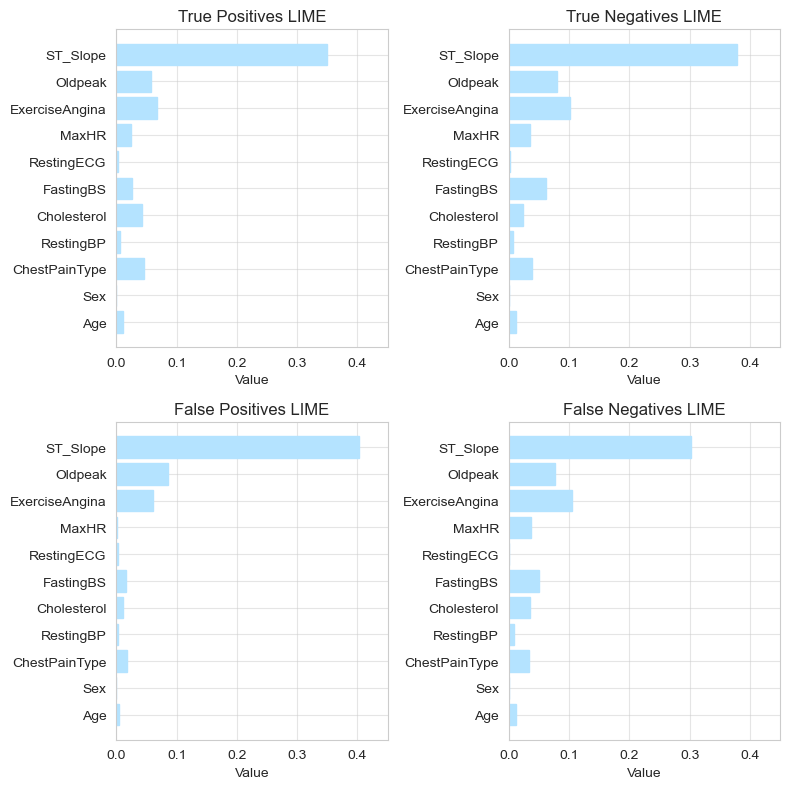

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the pastel blue and pastel orange colors
pastel_blue = '#B4E3FF'
pastel_orange = '#FFB6C1'

plots_titles = ['True Positives LIME', 'True Negatives LIME', 'False Positives LIME', 'False Negatives LIME']

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over each row in the DataFrame
for i, row in df.iterrows():
    # Get the values of the row as a list
    values = row.values

    # Create a bar plot for the current row in the corresponding subplot
    bars = axs[i].barh(range(len(values)), values)

    # Set the color for positive and negative values
    for j, bar in enumerate(bars):
        if values[j] >= 0:
            bar.set_color(pastel_blue)
        else:
            bar.set_color(pastel_orange)

    axs[i].set_yticks(range(len(values)))
    axs[i].set_yticklabels(df.columns) 
    axs[i].set_xlabel('Value')
    axs[i].set_title(f'{plots_titles[i]}')

    # Set grid and make it transparent
    axs[i].grid(True, alpha=0.5)
    axs[i].set_xlim([0, 0.45])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


<AxesSubplot:xlabel='ExerciseAngina', ylabel='Oldpeak'>

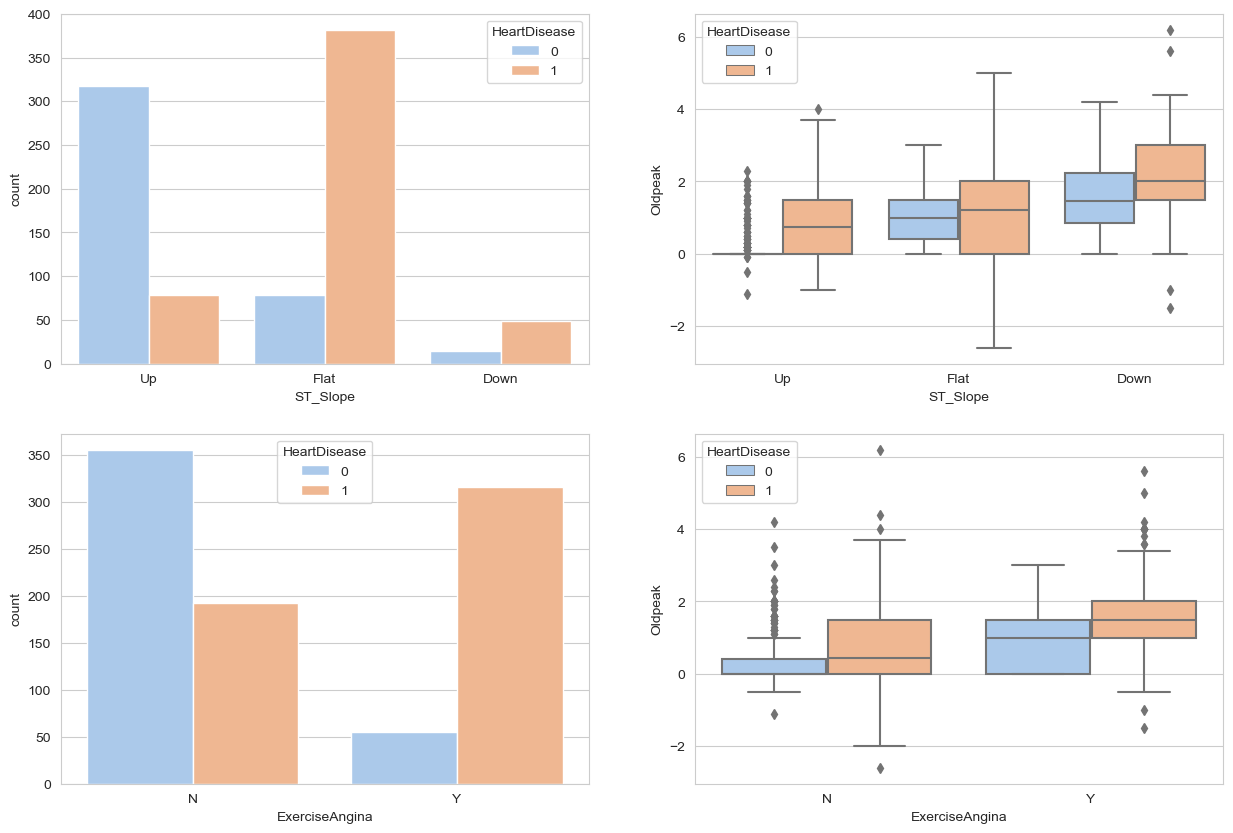

In [33]:
fig = plt.figure(figsize = (15,10))

my_pal = ['lightblue', 'lightyellow']

ax1 = fig.add_subplot(2, 2, 1)
sns.countplot(data = data, x = 'ST_Slope', ax=ax1, hue='HeartDisease', palette='pastel')

ax2 = fig.add_subplot(2,2,2)
sns.boxplot(data = data, x = 'ST_Slope', y = 'Oldpeak' , hue='HeartDisease',  
            ax=ax2, palette='pastel')

ax3 = fig.add_subplot(2,2,3)
sns.countplot(data = data, x = 'ExerciseAngina', ax=ax3, hue='HeartDisease', palette='pastel')

ax4 = fig.add_subplot(2,2,4)
sns.boxplot(data = data, x = 'ExerciseAngina', y = 'Oldpeak' , hue='HeartDisease',  
            ax=ax4, palette='pastel')

